# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

from newsapi import NewsApiClient

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\EbadS\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
news_api_key = os.getenv("NEWS_API_KEY")
type(news_api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key = news_api_key)
type(newsapi)

newsapi.newsapi_client.NewsApiClient

In [4]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    sort_by="relevancy",
    page_size =100
)

# Show the total number of news
print(f"Total Number of Bitcoin Headlines: ", btc_headlines["totalResults"])


Total Number of Bitcoin Headlines:  8724


In [5]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    sort_by="relevancy",
    page_size =100
)

# Show the total number of news
print(f"Total Number of Ethereum Headlines: ",eth_headlines["totalResults"])

Total Number of Ethereum Headlines:  4626


In [6]:
# Sentiment Score function to make scores using newsapi

def coin_sentiment_score(coin_headlines):
    coin_sentiments = []
    
    for article in coin_headlines["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)            
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            compound = sentiment["compound"]
        
            coin_sentiments.append({
                "text": text,
                "date": date,
                "positive": pos,
                "neutral": neu,
                "negative": neg,
                "compound": compound
            })
        
        except AttributeError as ae:
            pass

    # Creating coin_df Dataframes based on coin sentiments
    coin_df = pd.DataFrame(coin_sentiments)

    # reordering and naming of columns
    columns = ["date", "text", "positive", "neutral", "negative", "compound"]
    coin_df = coin_df[columns]

    return coin_df

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_df= coin_sentiment_score(btc_headlines)
btc_df

,date,text,positive,neutral,negative,compound
0,2022-04-08,Its set to open later this year\r\nIf you buy ...,0.000,0.919,0.081,-0.4404
1,2022-03-24,"Mr. Spiekers most prominent customer, whom he ...",0.072,0.831,0.097,-0.2280
2,2022-04-05,"You might have heard of crypto Twitter, the co...",0.000,0.943,0.057,-0.2732
3,2022-04-06,The wallet will have USB-C and a fingerprint r...,0.000,0.912,0.088,-0.4404
4,2022-04-05,German authorities have seized $25.2 million U...,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...
95,2022-04-11,The cryptocurrency world is at an all-time hig...,0.183,0.817,0.000,0.8519
96,2022-03-25,"Bitcoin on Friday briefly traded above $45,000...",0.154,0.846,0.000,0.6249
97,2022-03-11,The UK is cracking down on crypto ATMs.\r\nGet...,0.000,1.000,0.000,0.0000
98,2022-04-11,Andy Greenberg wrote a long article — an excer...,0.000,1.000,0.000,0.0000


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_df= coin_sentiment_score(eth_headlines)
eth_df

,date,text,positive,neutral,negative,compound
0,2022-03-29,Digital thieves just pulled off another major ...,0.000,0.898,0.102,-0.5106
1,2022-04-03,"This week, the cryptocurrency network Ronin di...",0.051,0.851,0.098,-0.4215
2,2022-04-05,April 5 (Reuters) - Ethereum blockchain scalin...,0.000,1.000,0.000,0.0000
3,2022-03-22,His name is Vitalik Buterin and after dedicati...,0.000,1.000,0.000,0.0000
4,2022-04-05,Regulatory solutions should be codified region...,0.323,0.594,0.083,0.7430
...,...,...,...,...,...,...
95,2022-03-11,Bottom Line: Gate.io is best for individuals a...,0.123,0.877,0.000,0.6369
96,2022-03-22,Bottom line: Betterment and Wealthfront both o...,0.293,0.707,0.000,0.9274
97,2022-03-16,"In cryptocurrency mining, miners need to use c...",0.251,0.749,0.000,0.8268
98,2022-03-30,The global fintech (financial technology) mark...,0.066,0.934,0.000,0.2263


In [12]:
import matplotlib.pyplot as plt

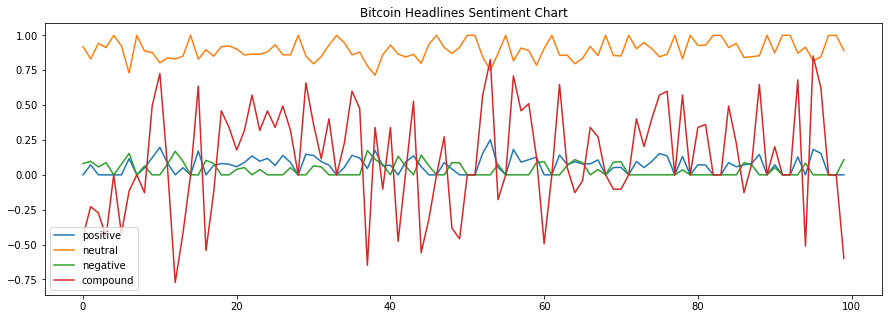

In [13]:
btc_df.plot(
    title = "Bitcoin Headlines Sentiment Chart",    
    figsize= (15,5),
    legend="left"
).legend(loc='lower left')
plt.savefig("../Images/btc_headlines_sentiment_chart.png", format="png")

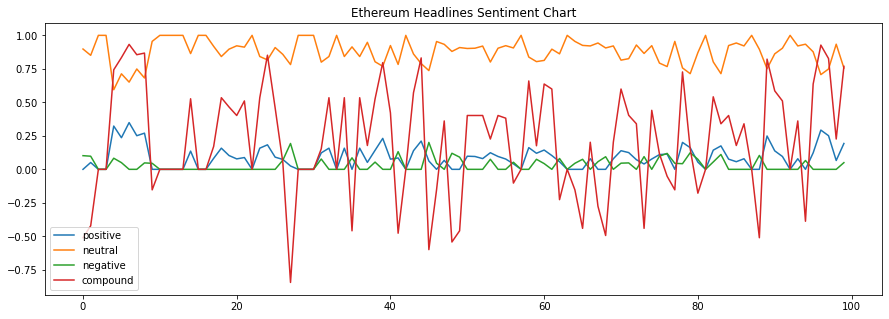

In [14]:
eth_df.plot(
    title = "Ethereum Headlines Sentiment Chart",    
    figsize= (15,5),
    legend="left"
).legend(loc='lower left')
plt.savefig("../Images/eth_headlines_sentiment_chart.png", format="png")

In [15]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,positive,neutral,negative,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.068590,0.895710,0.035690,0.126841
std,0.059966,0.069612,0.047173,0.374073
min,0.000000,0.714000,0.000000,-0.771300
25%,0.000000,0.850750,0.000000,-0.102700
50%,0.070000,0.885000,0.000000,0.051600
75%,0.110750,0.936750,0.075250,0.416125
max,0.251000,1.000000,0.174000,0.851900


In [16]:
# Describe the Ethereum Sentiment
eth_df.describe()

,positive,neutral,negative,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.087860,0.880400,0.031700,0.210893
std,0.084277,0.092949,0.046187,0.411866
min,0.000000,0.594000,0.000000,-0.844200
25%,0.000000,0.814500,0.000000,0.000000
50%,0.078500,0.904000,0.000000,0.202300
75%,0.139000,0.943000,0.055500,0.534600
max,0.349000,1.000000,0.201000,0.932700


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the hifghest mean positive: 0.087860

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score: 0.932700

Q. Which coin had the highest positive score?

A: Ethereum has the highest positive score: 0.349000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [17]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [18]:
# Instantiate the lemmatizer
lemm = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words("english"))

# Expand the default stopwords list if necessary
stop_words_expanded = {"USD", "exchanges" ,"announced" , "since", "way", "country", "dollar", "market","SEC"}
sw = stop_words.union(stop_words_expanded)

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z]")
    for word in text:
        regex.sub(" ", word)
        if word in punctuation:
            text = text.replace(word, " ")
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Lemmatize words into root words
    lemmed_words = [lemm.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    lower_case = [word.lower() for word in lemmed_words]
    
    # Remove the stop words
    tokens = [word for word in lower_case if word not in stop_words]
    
    return tokens

In [20]:
# Create a new tokens column for Bitcoin
btc_tokens = []

for i in range (len(btc_df)):
    btc_tokens.append(tokenizer(btc_df["text"][i]))
    
btc_df["tokens"] = btc_tokens
btc_df

,date,text,positive,neutral,negative,compound,tokens
0,2022-04-08,Its set to open later this year\r\nIf you buy ...,0.000,0.919,0.081,-0.4404,"[set, open, later, year, buy, something, verge..."
1,2022-03-24,"Mr. Spiekers most prominent customer, whom he ...",0.072,0.831,0.097,-0.2280,"[mr, spiekers, prominent, customer, described,..."
2,2022-04-05,"You might have heard of crypto Twitter, the co...",0.000,0.943,0.057,-0.2732,"[might, heard, crypto, twitter, corner, social..."
3,2022-04-06,The wallet will have USB-C and a fingerprint r...,0.000,0.912,0.088,-0.4404,"[wallet, usb, c, fingerprint, reader, image, j..."
4,2022-04-05,German authorities have seized $25.2 million U...,0.000,1.000,0.000,0.0000,"[german, authority, seized, 25, 2, million, us..."
...,...,...,...,...,...,...,...
95,2022-04-11,The cryptocurrency world is at an all-time hig...,0.183,0.817,0.000,0.8519,"[cryptocurrency, world, time, high, great, tim..."
96,2022-03-25,"Bitcoin on Friday briefly traded above $45,000...",0.154,0.846,0.000,0.6249,"[bitcoin, friday, briefly, traded, 45, 000, ps..."
97,2022-03-11,The UK is cracking down on crypto ATMs.\r\nGet...,0.000,1.000,0.000,0.0000,"[uk, cracking, crypto, atms, getty, regulators..."
98,2022-04-11,Andy Greenberg wrote a long article — an excer...,0.000,1.000,0.000,0.0000,"[andy, greenberg, wrote, long, article, —, exc..."


In [21]:
# Create a new tokens column for Ethereum
eth_tokens = []

for i in range (len(eth_df)):
    eth_tokens.append(tokenizer(eth_df["text"][i]))
    
eth_df["tokens"] = eth_tokens
eth_df

,date,text,positive,neutral,negative,compound,tokens
0,2022-03-29,Digital thieves just pulled off another major ...,0.000,0.898,0.102,-0.5106,"[digital, thief, pulled, another, major, crypt..."
1,2022-04-03,"This week, the cryptocurrency network Ronin di...",0.051,0.851,0.098,-0.4215,"[week, cryptocurrency, network, ronin, disclos..."
2,2022-04-05,April 5 (Reuters) - Ethereum blockchain scalin...,0.000,1.000,0.000,0.0000,"[april, 5, reuters, ethereum, blockchain, scal..."
3,2022-03-22,His name is Vitalik Buterin and after dedicati...,0.000,1.000,0.000,0.0000,"[name, vitalik, buterin, dedicating, cover, re..."
4,2022-04-05,Regulatory solutions should be codified region...,0.323,0.594,0.083,0.7430,"[regulatory, solution, codified, regionally, i..."
...,...,...,...,...,...,...,...
95,2022-03-11,Bottom Line: Gate.io is best for individuals a...,0.123,0.877,0.000,0.6369,"[bottom, line, gate, io, best, individual, ins..."
96,2022-03-22,Bottom line: Betterment and Wealthfront both o...,0.293,0.707,0.000,0.9274,"[bottom, line, betterment, wealthfront, offer,..."
97,2022-03-16,"In cryptocurrency mining, miners need to use c...",0.251,0.749,0.000,0.8268,"[cryptocurrency, mining, miner, need, use, com..."
98,2022-03-30,The global fintech (financial technology) mark...,0.066,0.934,0.000,0.2263,"[global, fintech, financial, technology, marke..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [22]:
from collections import Counter
from nltk import ngrams

In [23]:
# Creating function to flatgten tokens
def flat(lst):
    return [item for sublist in lst for item in sublist]

# Creating a list for btc and eth
btc_flat = flat(btc_tokens)
eth_flat = flat(eth_tokens)

In [24]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = ngrams(btc_flat, n=2)
btc_ngrams

In [25]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = ngrams(eth_flat, n=2)
eth_ngrams

In [26]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [27]:
# Use token_count to get the top 10 words for Bitcoin
btc_count = token_count(btc_ngrams)
btc_count

[(('char', 'london'), 9),
 (('london', 'march'), 8),
 (('el', 'salvador'), 7),
 (('char', 'march'), 7),
 (('march', '22'), 7),
 (('22', 'reuters'), 7),
 (('char', 'bitcoin'), 6),
 (('reuters', 'bitcoin'), 6),
 (('new', 'york'), 5),
 (('2', 'million'), 4)]

In [28]:
# Use token_count to get the top 10 words for Ethereum
eth_count = token_count(eth_ngrams)
eth_count

[(('ethereum', 'eth'), 8),
 (('axie', 'infinity'), 6),
 (('char', 'cryptocurrency'), 6),
 (('char', 'personal'), 5),
 (('personal', 'finance'), 5),
 (('finance', 'insider'), 5),
 (('insider', 'writes'), 5),
 (('writes', 'product'), 5),
 (('product', 'strategy'), 5),
 (('strategy', 'tip'), 5)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

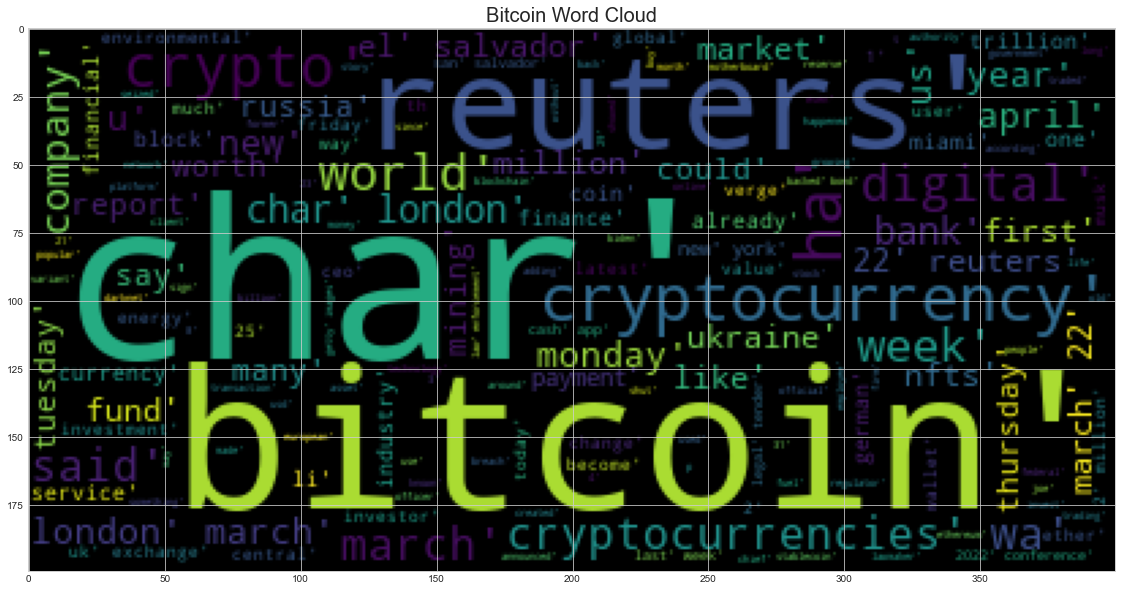

In [30]:
# Generate the Bitcoin word cloud
btc_word_cloud = WordCloud().generate(str(btc_flat))
plt.imshow(btc_word_cloud)
plt.title("Bitcoin Word Cloud", fontdict={'fontsize':20})
plt.savefig("../Images/btc_word_cloud.png", format="png")

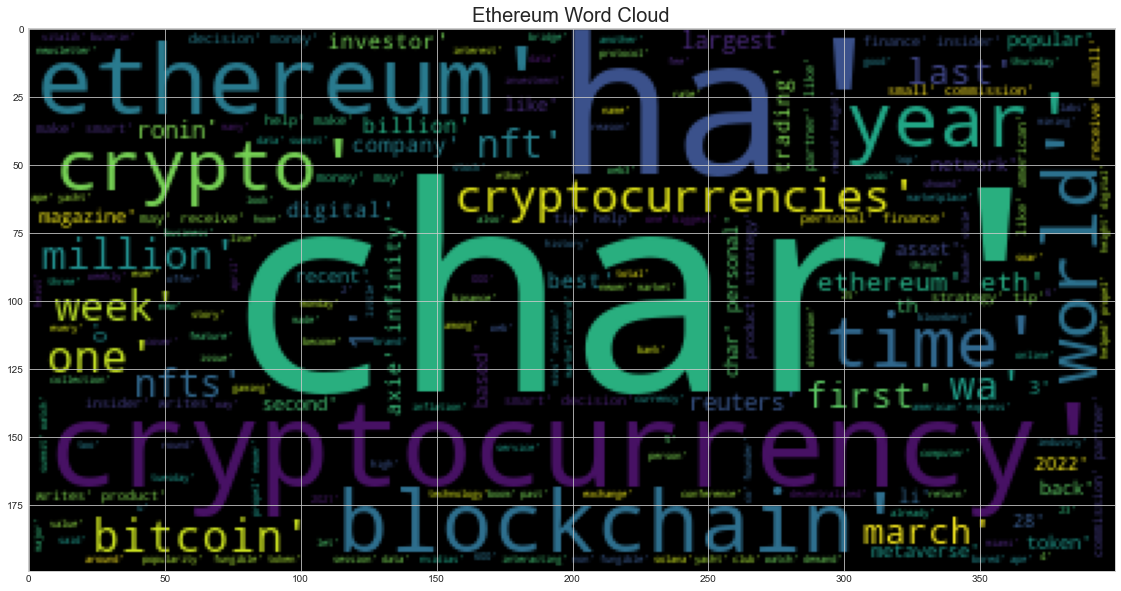

In [31]:
# Generate the Ethereum word cloud
eth_word_cloud = WordCloud().generate(str(eth_flat))
plt.imshow(eth_word_cloud)
plt.title("Ethereum Word Cloud", fontdict={'fontsize':20})
plt.savefig("../Images/eth_word_cloud.png", format="png")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [32]:
import spacy
from spacy import displacy

In [33]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

2022-04-12 19:39:37.334776: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-04-12 19:39:37.334805: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\EbadS\anaconda3\envs\mlenv\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\EbadS\anaconda3\envs\mlenv\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\EbadS\anaconda3\envs\mlenv\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\EbadS\anaconda3\envs\mlenv\lib\http\client.py", line 465, in read
    n = self.readinto(b)
  File "C:\Users\EbadS\anaconda3\envs\mlenv\li

  File "C:\Users\EbadS\anaconda3\envs\mlenv\lib\site-packages\pip\_internal\resolution\resolvelib\factory.py", line 209, in _make_candidate_from_link
    version=version,
  File "C:\Users\EbadS\anaconda3\envs\mlenv\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 301, in __init__
    version=version,
  File "C:\Users\EbadS\anaconda3\envs\mlenv\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 156, in __init__
    self.dist = self._prepare()
  File "C:\Users\EbadS\anaconda3\envs\mlenv\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 227, in _prepare
    dist = self._prepare_distribution()
  File "C:\Users\EbadS\anaconda3\envs\mlenv\lib\site-packages\pip\_internal\resolution\resolvelib\candidates.py", line 306, in _prepare_distribution
    self._ireq, parallel_builds=True
  File "C:\Users\EbadS\anaconda3\envs\mlenv\lib\site-packages\pip\_internal\operations\prepare.py", line 508, in prepare_linked_requirement
  

In [35]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [36]:
# Concatenate all of the Bitcoin text together
btc_text = btc_df["text"].str.cat()

In [37]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_text)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER (Name Entity Recognition) "

In [38]:
# Render the visualization
displacy.render(btc_ner, style="ent")

In [39]:
# List all Entities
print(f"List of all entities in BTC NER: \n", btc_ner.ents)

List of all entities in BTC NER: 
 (later this year, Verge, Vox Media, Alex Castro, Verge, Eastern European, Spieker, 620,000, Twitter, Bored Apes, Bitcoin, USB-C, Twitter, Jack Dorsey’s, $25.2 million, Bitcoin, German, Russian, Hydra, 23 million, Friday, Axios, 19 million, Grayscale Bitcoin Trust, Russia, Ukraine, Niki Proshin, a year, YouTube, TikTok, Instagram, Russian, Reuters, $10 billion, March 23, Reuters, El Salvador, Binance, Central, BEACH, April 7, Reuters, Samson Mow, Thursday, Jan3, Jack Dorsey, three, Cash App, Bitcoin 2022, Thursday, CoinDesk, Intelligence, Cash App, the New York Times, Ronin, $540 million, Ethereum, USDC, 27, Reuters, 4.41%, 46,499.29, Sunday, 1,963.64, Bitcoin, 41.1%, Reuters, this week, German, US, Hydra Market, +1524, today, 8.2 million, Cash App, SEC, December 10th, this week, Getty
Welcome to, Nonfungible Tidbits, weekly, this week, March 31, Reuters, European Union, Thursday, 29, Reuters, first quarter, $2 trillion, March 22, Reuters, El Salvador,

---

### Ethereum NER

In [40]:
# Concatenate all of the Ethereum text together
eth_text = eth_df["text"].str.cat()

In [41]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_text)

# Add a title to the document
eth_ner.user_data["title"] = "Etherum NER (Name Entity Recognition)"

In [42]:
# Render the visualization
displacy.render(eth_ner, style="ent")

In [43]:
# List all Entities
print(f"List of all entities in ETH NER: \n", eth_ner.ents)

List of all entities in ETH NER: 
 (Digital, Motherboard, 173,600, Ethereum, about $591.2 million, Ronin, Axie Infinity, Ronin, $540 million, Ethereum, USDC, Reuters, Boba Network, $45 million, Will Smith-led, Dreamers VC, Paris Hilton, Vitalik Buterin, TIME, Bloomberg, Getty Images, 28-year-old, Russian, Chrome, Brave, Transform, July 19, July 20 - August 3, 6, the last year, Bored Ape Yacht Club, one, Ethereum, the past few years, NFT, $25 billion, the past few years, NFT, $24 billion, TIME, weekly, Reuters, 4.41%, 46,499.29, Sunday, 1,963.64, Bitcoin, 41.1%, the past few years, NFT, $23 billion, +2603 chars]NEW YORK, March 21, Reuters, a second straight week, CoinShares, Monday, March 24, Reuters, Leumi, first, Israeli, Pepper Invest, Thursday, U.S, Aparna Chennapragada, Bitcoin 2022, Miami, ETH, Ronin, February 2021, Ethereum, Axie Infinity, Ethereum, Ronin, Finance Insider, American Express, this morning, Ethereum, +2093, $450 million, Series, US, over $7 billion, days, March 11, 

---